In [219]:
import pandas as pd
import numpy as np
import dvc.api
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [220]:
#Create and configure logger
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')

In [221]:
#Creating an object
logger=logging.getLogger()

In [222]:
path = ['data/store.csv', 'data/train.csv', 'data/test.csv']
version = ['store_v1', 'train_v1', 'test_v1']

In [223]:
    repo = '/home/michael/Pharmaceutical-Sales-prediction-across-multiple-stores'
    data_url = dvc.api.get_url(
        path = path[0],
        repo = repo,
        rev=version[0]
        )
    data_url2 = dvc.api.get_url(
        path = path[1],
        repo = repo,
        rev=version[1]
        )
    data_url3 = dvc.api.get_url(
        path = path[2],
        repo = repo,
        rev=version[2]
        )

    df_store = pd.read_csv(data_url)
    df_train = pd.read_csv(data_url2)
    df_test = pd.read_csv(data_url3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [224]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [225]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [226]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [228]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [229]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [230]:
len(df_train)

1017209

In [231]:
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['WeekOftheYear'] = df_train['Date'].dt.weekofyear

<ipython-input-231-667405014bab>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['WeekOftheYear'] = df_train['Date'].dt.weekofyear


In [232]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [233]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOftheYear    0
dtype: int64

In [234]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [235]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [236]:
len(df_store)

1115

In [237]:
# impute the missing value in store data
df_test['Open'].fillna(df_test['Open'].mode, inplace = True)
df_test.isnull().values.any()

False

In [238]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [239]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [240]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [241]:
df_store1 = df_store.copy()

In [242]:
df_store['Promo2SinceWeek'].fillna(df_store['Promo2SinceWeek'].mode, inplace = True)
df_store['Promo2SinceYear'].fillna(df_store['Promo2SinceYear'].mode, inplace = True)
df_store['PromoInterval'].fillna(df_store['PromoInterval'].mode, inplace = True)
df_store.isnull().values.any()

True

In [243]:
# impute the missing values in store data
df_store['CompetitionOpenSinceMonth'].fillna(df_store['CompetitionOpenSinceMonth'].mode, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(df_store['CompetitionOpenSinceYear'].mode, inplace = True)
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)
df_store.isnull().values.any()

False

In [244]:
store_train = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

In [245]:
store_train.groupby('StoreType')['Customers', 'Sales'].sum()

<ipython-input-245-5222cd9f3be2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_train.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


In [246]:
# Create a Day of Week feature
store_train['day_of_week'] = store_train['Date'].dt.day_name()

In [247]:
store_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'WeekOftheYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'day_of_week'],
      dtype='object')

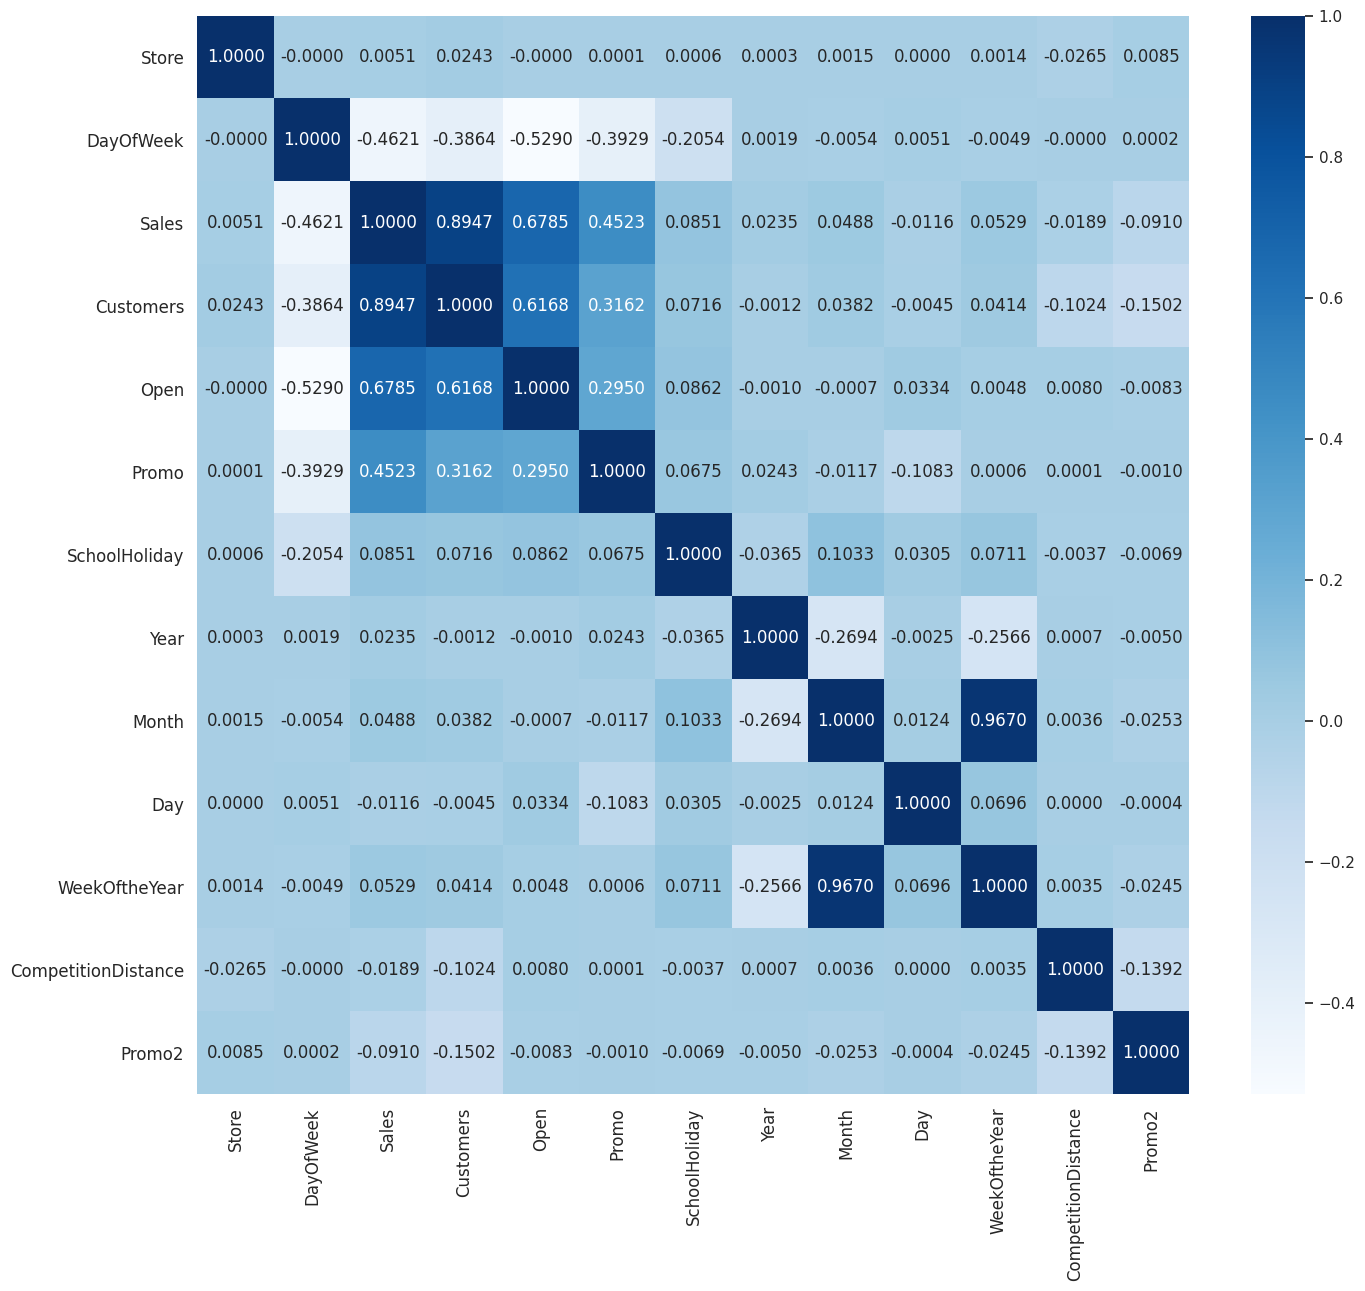

In [248]:
#correlation matrix
corrMatrix= store_train.corr()
f, ax = plt.subplots(figsize=(16, 14))
res=sns.heatmap(corrMatrix,cmap="Blues",annot=True,fmt='.4f',annot_kws={"size":12})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
plt.show()

In [249]:
len(df_train.Store.value_counts())

1115

In [250]:
stores = df_train.groupby('Store')

In [251]:
stores_total = stores['Sales'].sum()

In [252]:
stores_total.head()

Store
1    3716854
2    3883858
3    5408261
4    7556507
5    3642818
Name: Sales, dtype: int64

In [253]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_counts(df:pd.DataFrame, column1:str) -> None:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=column1)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column1}', size=20, fontweight='bold')
    plt.show()

In [254]:
train_store = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

In [255]:
week_day_df = store_train.groupby('day_of_week')

In [256]:
week_day_df['Customers'].value_counts()

day_of_week  Customers
Friday       0            7212
             646           470
             619           458
             555           450
             560           443
                          ... 
Wednesday    4315            1
             4356            1
             4424            1
             4438            1
             5106            1
Name: Customers, Length: 20285, dtype: int64

In [257]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'WeekOftheYear'],
      dtype='object')

In [258]:
df_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [259]:
train_promo = df_train.Promo
test_promo = df_test.Promo
promo = pd.DataFrame()
promo['train promo'] = df_train.Promo
promo['test promo'] = df_test.Promo

In [260]:
promo.head()

,train promo,test promo
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


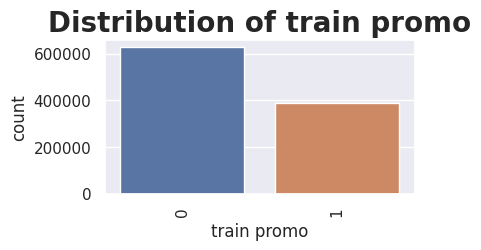

In [261]:
# Distribution of train promotion
plot_counts(promo, 'train promo')

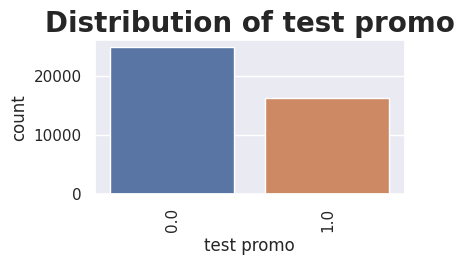

In [262]:
# Distribution of test promotion
plot_counts(promo, 'test promo')

In [263]:
(promo['test promo'].value_counts().tolist()[0]/promo['test promo'].value_counts().tolist()[1],
promo['train promo'].value_counts().tolist()[0]/promo['train promo'].value_counts().tolist()[1])

(1.5263157894736843, 1.6211322407750979)

In [264]:
len(promo[promo['test promo'] == 0])/len(promo[promo['test promo']==1])

1.5263157894736843

In [265]:
len(promo[promo['train promo'] == 0])/len(promo[promo['train promo']==1])

1.6211322407750979

In [266]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  WeekOftheYear  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 100.9+ MB


In [267]:
#check seasonality for the given store
def seasonality(store):
    sale = df_train[df_train.Store == store]
    sale = sale[(sale.Year == 2015) | (sale.Year == 2014) | (sale.Year == 2013)]
    sale = sale.sort_values(by = "Date",ascending= False)
    sns.set(rc = {'figure.figsize':(20,8)})
    sns.lineplot(x = sale["Date"], y = sale["Sales"], color = 'red')
    plt.xticks(rotation=90)
    plt.title(f'seasonality of store {store}', size=20, fontweight='bold')
    plt.xlabel('Date', fontsize=18, fontweight = 'bold')
    plt.ylabel('Sales', fontsize=16, fontweight = 'bold')
    plt.show()

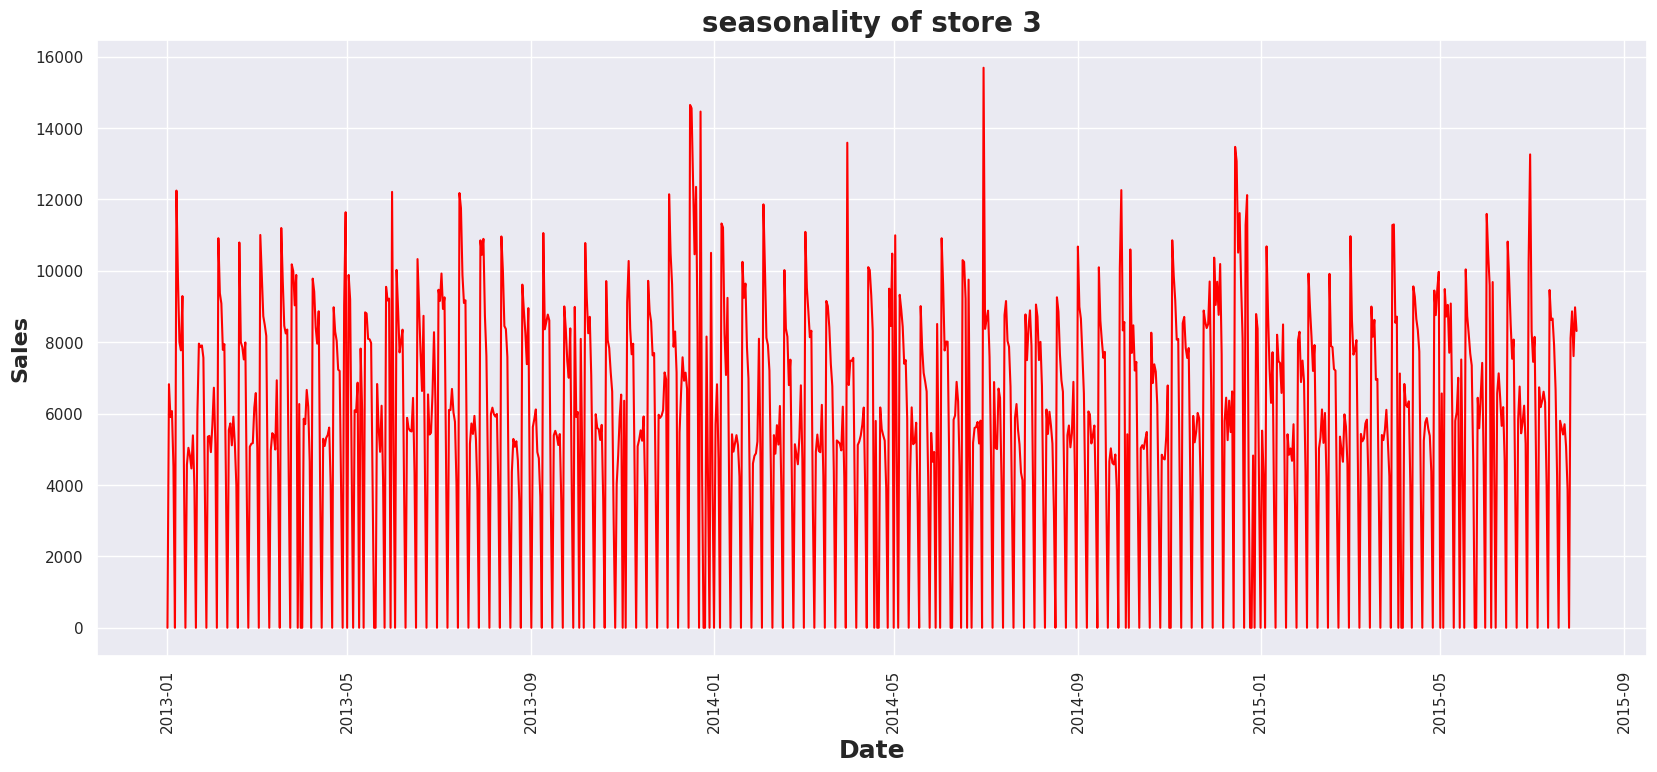

In [268]:
seasonality(3)

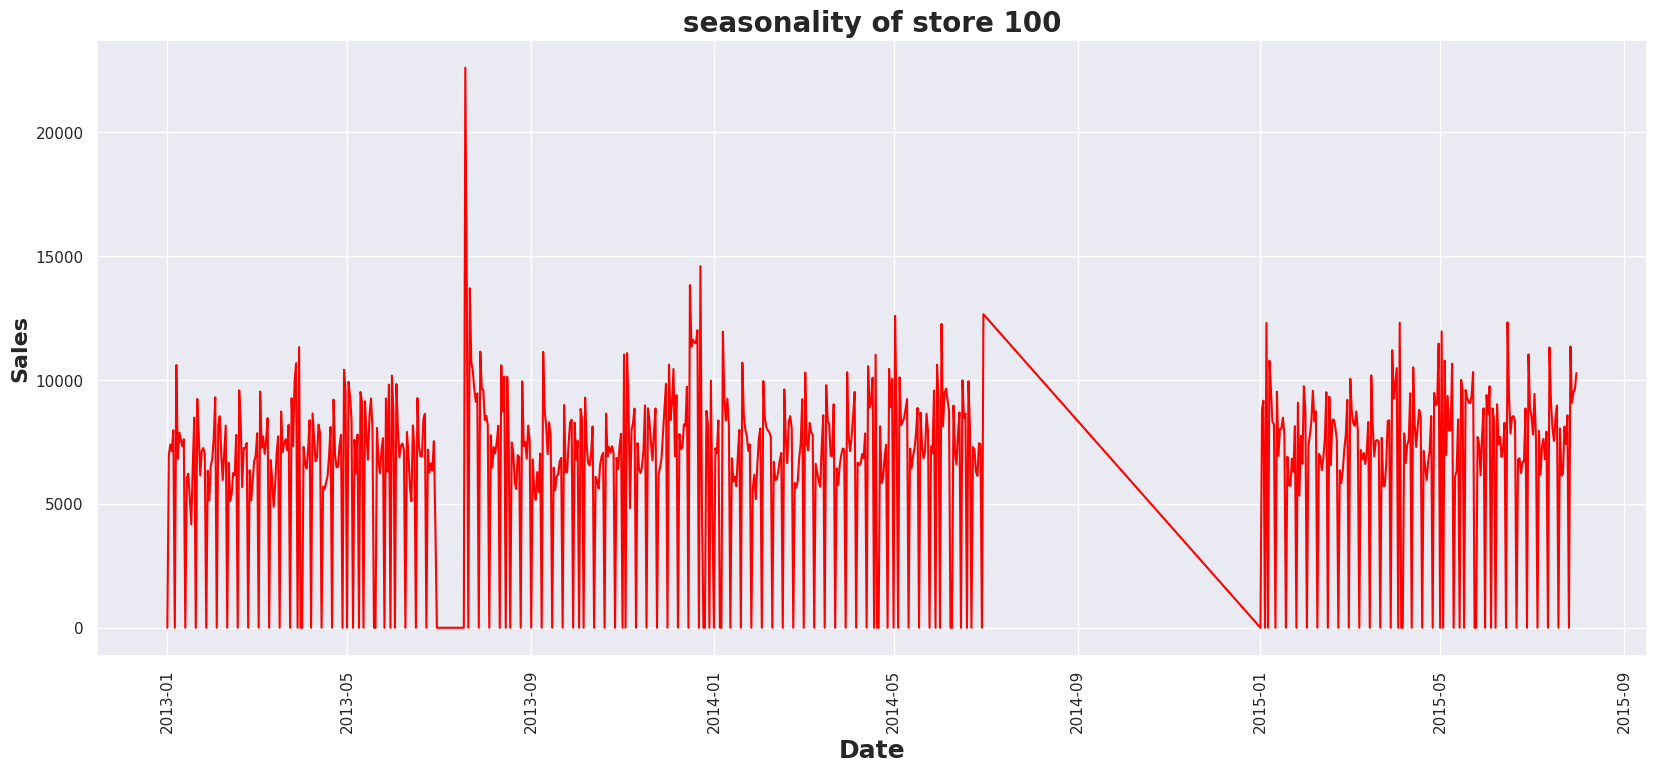

In [269]:
seasonality(100)

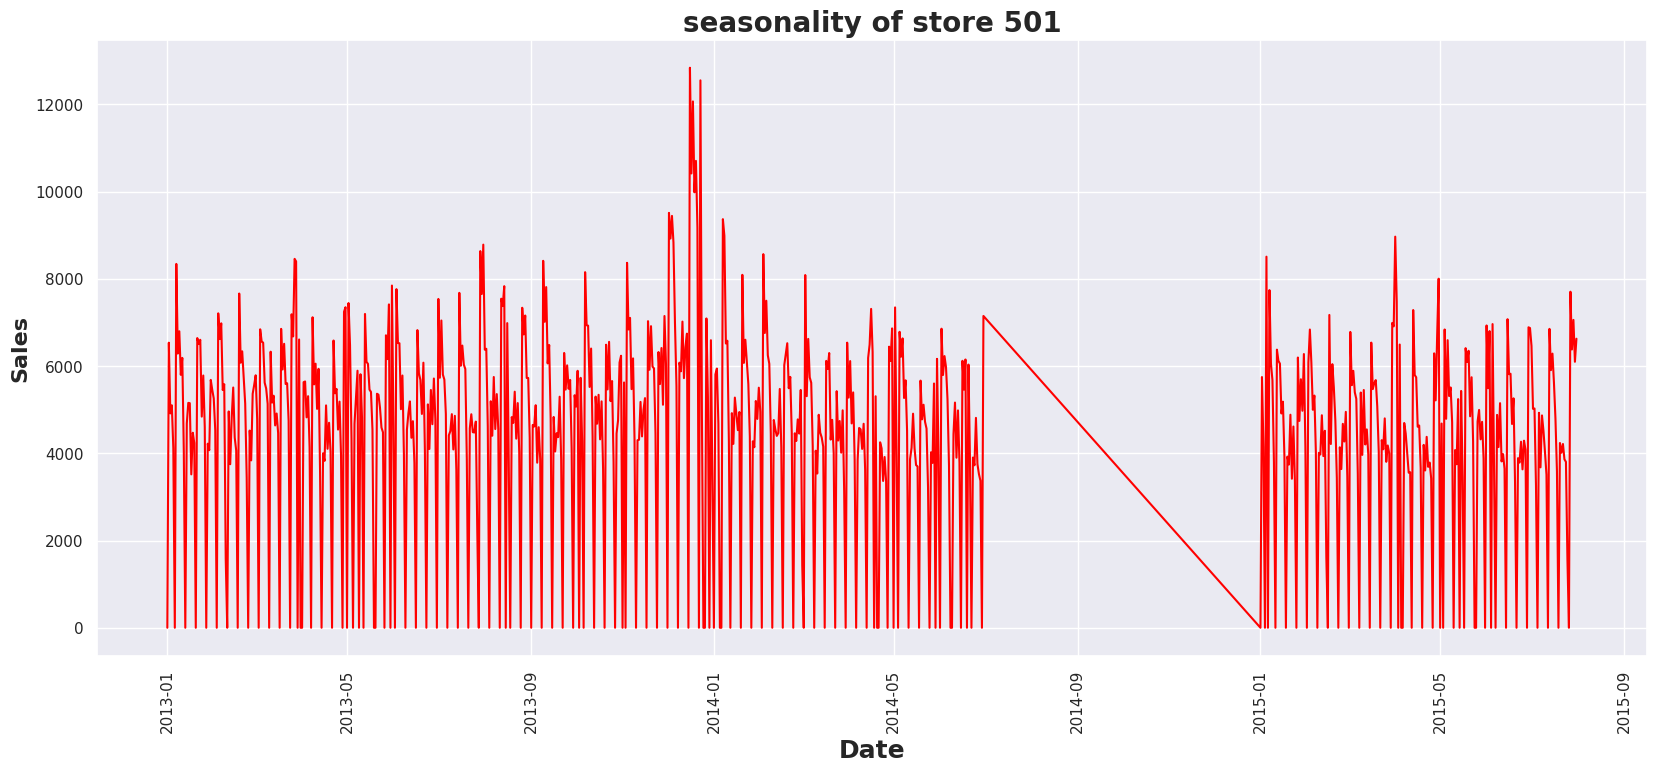

In [270]:
seasonality(501)

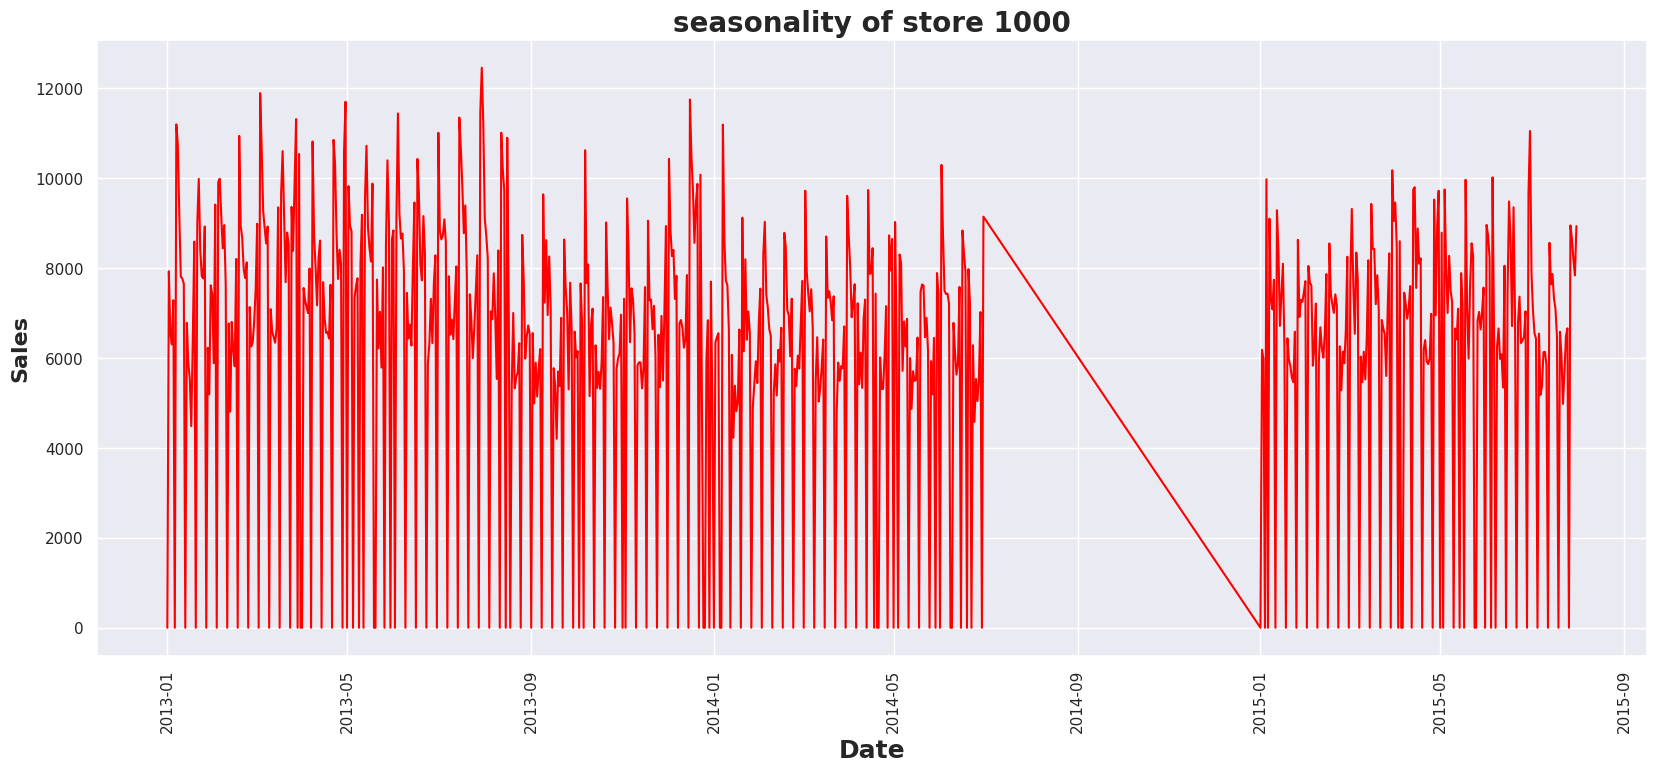

In [271]:
seasonality(1000)

In [272]:
store_1000 = df_train.groupby('Store').get_group(1000)

In [273]:
store_1000.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
999,1000,5,2015-07-31,8935,749,1,1,0,0,2015,7,31,31
2114,1000,4,2015-07-30,7840,727,1,1,0,0,2015,7,30,31
3229,1000,3,2015-07-29,8193,645,1,1,0,0,2015,7,29,31
4344,1000,2,2015-07-28,8648,709,1,1,0,0,2015,7,28,31
5459,1000,1,2015-07-27,8951,742,1,1,0,0,2015,7,27,31


In [281]:
outliers = store_1000[(store_1000['Date']>'2014-07-01') & (store_1000['Date']<'2015-01-30') ]
pre_holiday = df_train[(df_train["Date"]> '2013-12-09') & (df_train["Date"]< '2013-12-22')  ]

In [286]:
outliers.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
210619,1000,6,2015-01-24,6587,613,1,0,0,0,2015,1,24,4
206159,1000,3,2015-01-28,7294,665,1,1,0,0,2015,1,28,5
205044,1000,4,2015-01-29,7253,631,1,1,0,0,2015,1,29,5
215079,1000,2,2015-01-20,5964,568,1,0,0,0,2015,1,20,4
209504,1000,7,2015-01-25,0,0,0,0,0,0,2015,1,25,4
231804,1000,1,2015-01-05,9979,860,1,1,0,1,2015,1,5,2
227344,1000,5,2015-01-09,7084,640,1,1,0,0,2015,1,9,2
211734,1000,5,2015-01-23,5461,512,1,0,0,0,2015,1,23,4
212849,1000,4,2015-01-22,5564,557,1,0,0,0,2015,1,22,4
218424,1000,6,2015-01-17,6253,574,1,0,0,0,2015,1,17,3


In [288]:
outliers['Date'].value_counts()

2015-01-01    1
2015-01-04    1
2015-01-13    1
2015-01-19    1
2015-01-25    1
2015-01-06    1
2015-01-12    1
2015-01-18    1
2015-01-24    1
2015-01-05    1
2015-01-11    1
2015-01-17    1
2015-01-23    1
2015-01-29    1
2015-01-10    1
2015-01-26    1
2015-01-16    1
2015-01-22    1
2015-01-28    1
2015-01-03    1
2015-01-09    1
2015-01-15    1
2015-01-21    1
2015-01-27    1
2015-01-02    1
2015-01-08    1
2015-01-14    1
2015-01-20    1
2015-01-07    1
Name: Date, dtype: int64

NameError: name 'store_100' is not defined

In [277]:
#sales behavior before, during and after holidays
pre_holiday = df_train[(df_train["Date"]> '2013-12-09') & (df_train["Date"]< '2013-12-22')  ]

during_holiday= df_train[(df_train["Date"]> '2013-12-22') & (df_train["Date"]< '2013-12-31')  ]

post_holiday = df_train[(df_train["Date"]> '2013-12-31') & (df_train["Date"]< '2014-01-15')  ]

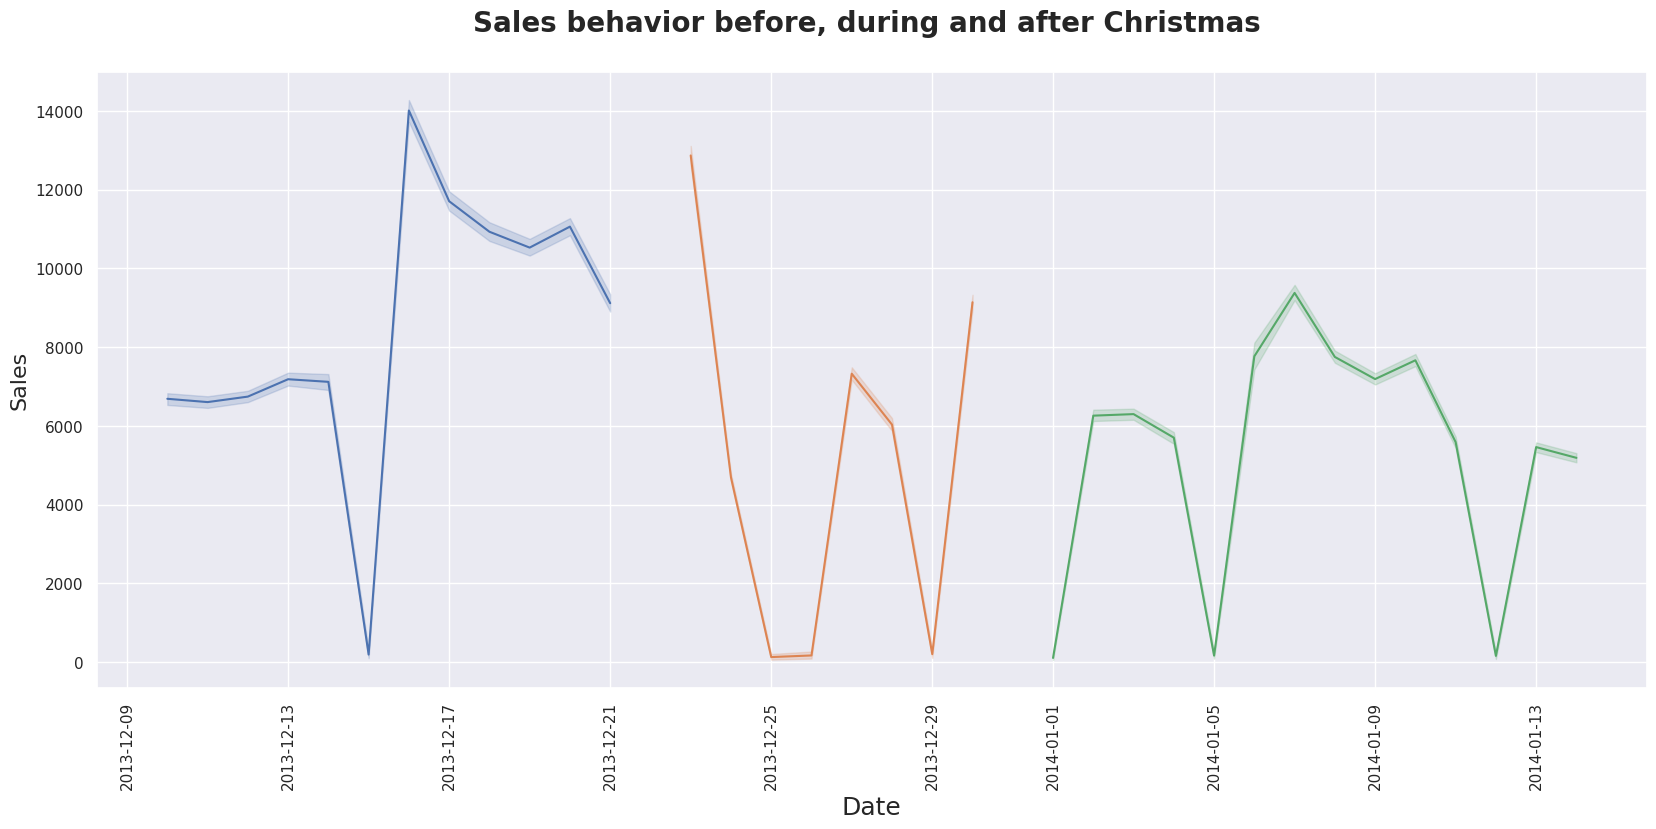

In [279]:
sns.lineplot(x = pre_holiday["Date"] , y = pre_holiday["Sales"])
sns.lineplot(x = during_holiday["Date"] , y = during_holiday["Sales"])
sns.lineplot(x = post_holiday["Date"] , y = post_holiday["Sales"])
plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.title(f'Sales behavior before, during and after Christmas \n', size=20, fontweight='bold')
plt.show()

In [291]:
# Store with maximum sale count
df_train[df_train["Sales"] == df_train["Sales"].max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
44393,909,1,2015-06-22,41551,1721,1,0,0,0,2015,6,22,26


In [292]:
# Store with minmum sale count
df_train[df_train["Sales"] == df_train["Sales"].max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
44393,909,1,2015-06-22,41551,1721,1,0,0,0,2015,6,22,26
